# 曲线拟合

导入基础包

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 多项式拟合

导入线多项式拟合工具：

In [2]:
from numpy import polyfit, poly1d

产生数据：

In [3]:
x = np.linspace(-5, 5, 100)
y = 4 * x + 1.5
noise_y = y + np.random.randn(y.shape[-1]) * 2.5

画出数据：

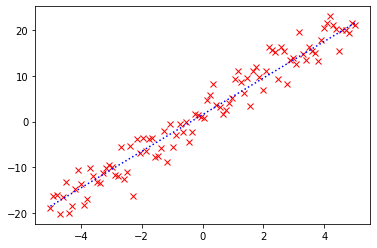

In [7]:
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, y, 'b:')

进行线性拟合，`polyfit` 是多项式拟合函数，线性拟合即一阶多项式：

In [8]:
coeff = polyfit(x, noise_y, 1)
print(coeff)

[4.14008358 1.69112599]


一阶多项式 $y = a_1 x + a_0$ 拟合，返回两个系数 $[a_1, a_0]$。

画出拟合曲线：

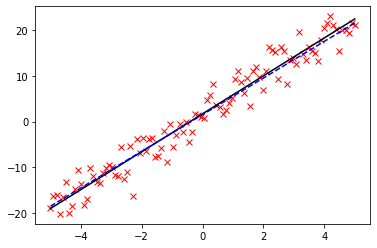

In [12]:
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, coeff[0] * x + coeff[1], 'k-')
p = plt.plot(x, y, 'b--')

还可以用 `poly1d` 生成一个以传入的 `coeff` 为参数的多项式函数：

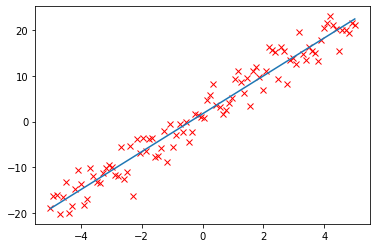

In [17]:
f = poly1d(coeff)
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, f(x))

In [18]:
f

poly1d([4.14008358, 1.69112599])

显示 `f`：

In [19]:
print(f)

 
4.14 x + 1.691


还可以对它进行数学操作生成新的多项式：

In [21]:
print(f + 2 * f ** 2)

       2
34.28 x + 32.15 x + 7.411


## 多项式拟合正弦函数

正弦函数：

In [23]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

用一阶到九阶多项式拟合，类似泰勒展开：

In [26]:
y1 = poly1d(polyfit(x,y,1))
y3 = poly1d(polyfit(x,y,3))
y5 = poly1d(polyfit(x,y,5))
y7 = poly1d(polyfit(x,y,7))
y9 = poly1d(polyfit(x,y,9))

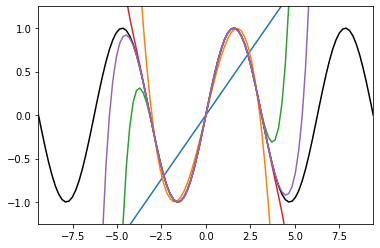

In [29]:
x = np.linspace(-3*np.pi, 3*np.pi, 100)

p = plt.plot(x, np.sin(x), 'k')
p = plt.plot(x, y1(x))
p = plt.plot(x, y3(x))
p = plt.plot(x, y5(x))
p = plt.plot(x, y7(x))
p = plt.plot(x, y9(x))

a = plt.axis([-3*np.pi, 3*np.pi, -1.25, 1.25])

黑色为原始的图形，可以看到，随着多项式拟合的阶数的增加，曲线与拟合数据的吻合程度在逐渐增大。

## 最小二乘拟合

导入相关的模块：

In [30]:
from scipy.linalg import lstsq
from scipy.stats import linregress

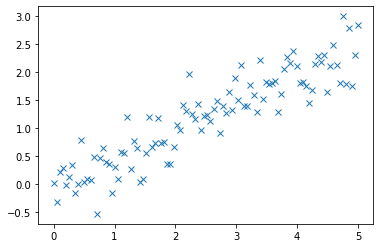

In [38]:
x = np.linspace(0, 5, 100)
y = 0.5 * x + np.random.randn(x.shape[-1]) * 0.35

plt.plot(x, y, 'x')

一般来说，当我们使用一个 N-1 阶的多项式拟合这 M 个点时，有这样的关系存在：

$$XC = Y$$

即

$$\left[ \begin{matrix}
x_0^{N-1} & \dots & x_0 & 1 \\\
x_1^{N-1} & \dots & x_1 & 1 \\\
\dots & \dots & \dots & \dots \\\
x_M^{N-1} & \dots & x_M & 1
\end{matrix}\right] 
\left[ \begin{matrix} C_{N-1} \\\ \dots \\\ C_1 \\\ C_0 \end{matrix} \right] =
\left[ \begin{matrix} y_0 \\\ y_1 \\\ \dots \\\ y_M \end{matrix} \right]$$

### Scipy.linalg.lstsq 最小二乘解

要得到 `C` ，可以使用 `scipy.linalg.lstsq` 求最小二乘解。

这里，我们使用 1 阶多项式即 `N = 2`，先将 `x` 扩展成 `X`：

In [41]:
X = np.hstack((x[:,np.newaxis], np.ones((x.shape[-1], 1))))
X[1:5]

array([[0.05050505, 1.        ],
       [0.1010101 , 1.        ],
       [0.15151515, 1.        ],
       [0.2020202 , 1.        ]])

求解：

In [42]:
C, resid, rank, s = lstsq(X, y)
C, resid, rank, s

(array([ 0.50338373, -0.0619614 ]),
 10.953981959103855,
 2,
 array([30.23732043,  4.82146667]))

画图：

sum squared residual = 10.954
rank of the X matrix = 2
singular values of X = [30.23732043  4.82146667]


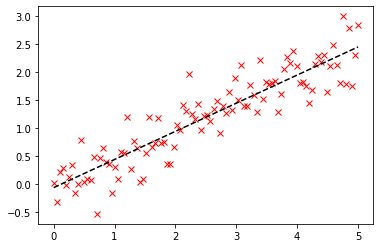

In [49]:
p = plt.plot(x, y, 'rx')
p = plt.plot(x, C[0] * x + C[1], 'k--')
print("sum squared residual = {:.3f}".format(resid))
print("rank of the X matrix = {}".format(rank))
print("singular values of X = {}".format(s))

### Scipy.stats.linregress 线性回归

对于上面的问题，还可以使用线性回归进行求解：

In [50]:
slope, intercept, r_value, p_value, stderr = linregress(x, y)
slope, intercept

(0.503383730692842, -0.061961404312694146)

R-value = 0.912
p-value (probability there is no correlation) = 1.296e-39
Root mean squared error of the fit = 0.151


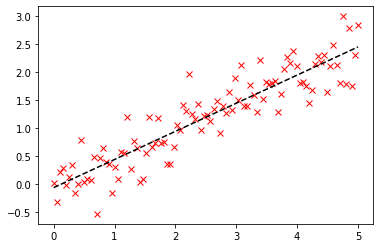

In [52]:
p = plt.plot(x, y, 'rx')
p = plt.plot(x, slope * x + intercept, 'k--')
print("R-value = {:.3f}".format(r_value))
print("p-value (probability there is no correlation) = {:.3e}".format(p_value))
print("Root mean squared error of the fit = {:.3f}".format(np.sqrt(stderr)))

可以看到，两者求解的结果是一致的，但是出发的角度是不同的。

## 更高级的拟合

In [53]:
from scipy.optimize import leastsq

先定义这个非线性函数：$y = a e^{-b sin( f x + \phi)}$

In [54]:
def function(x, a, b, f, phi):
    """a function of x with four parameters"""
    result = a * np.exp(-b * np.sin(f * x + phi))
    return result

画出原始曲线：

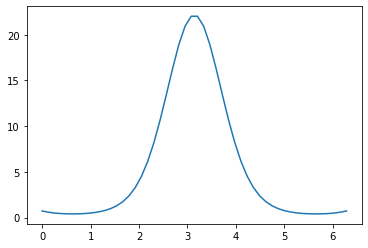

In [55]:
x = np.linspace(0, 2 * np.pi, 50)
actual_parameters = [3, 2, 1.25, np.pi /4]
y = function(x, *actual_parameters)
p = plt.plot(x, y)

加入噪声：

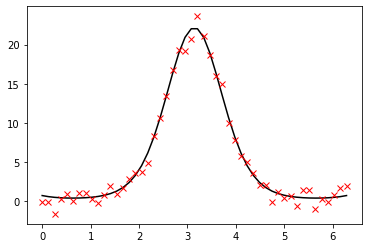

In [58]:
from scipy.stats import norm
y_noisy = y + 0.8 * norm.rvs(size=len(x))
p = plt.plot(x, y, 'k-')
p = plt.plot(x, y_noisy, 'rx')

### Scipy.optimize.leastsq

定义误差函数，将要优化的参数放在前面：

In [59]:
def f_err(p, y, x):
    return y - function(x, *p)

将这个函数作为参数传入 `leastsq` 函数，第二个参数为初始值：

In [60]:
c, ret_val = leastsq(f_err, [1,1,1,1], args=(y_noisy, x))
c, ret_val

(array([2.74706788, 2.08440583, 1.22879234, 0.84235185]), 1)

`ret_val` 是 1~4 时，表示成功找到最小二乘解：

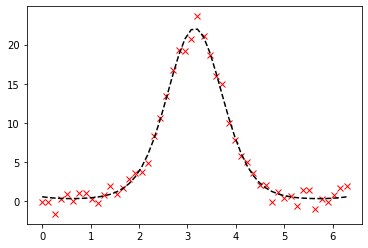

In [61]:
p = plt.plot(x, y_noisy, 'rx')
p = plt.plot(x, function(x, *c), 'k--')

### Scipy.optimize.curve_fit

更高级的做法：

In [62]:
from scipy.optimize import curve_fit

不需要定义误差函数，直接传入 `function` 作为参数：

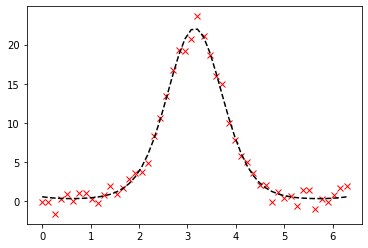

In [66]:
p_est, err_est = curve_fit(function, x, y_noisy)
p_est

p = plt.plot(x, y_noisy, 'rx')
p = plt.plot(x, function(x, *p_est), 'k--')

这里第一个返回的是函数的参数，第二个返回值为各个参数的协方差矩阵：

In [67]:
print(err_est)

[[ 0.25573656 -0.09204134  0.03119839 -0.09825184]
 [-0.09204134  0.03340496 -0.01106775  0.0348552 ]
 [ 0.03119839 -0.01106775  0.00429931 -0.01353971]
 [-0.09825184  0.0348552  -0.01353971  0.04283777]]


协方差矩阵的对角线为各个参数的方差：

In [70]:
print("normalized relative errors for each parameter")
print("   a\t  b\t f\tphi")
print(np.sqrt(err_est.diagonal()) / p_est)

normalized relative errors for each parameter
   a	  b	 f	phi
[0.18408867 0.08768457 0.05336065 0.24570831]
